<a href="https://colab.research.google.com/github/min-program/Deep_learning/blob/main/CNN_Funtional_API_%EB%8B%A4%EC%A4%91%EC%B6%9C%EB%A0%A5%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import numpy as np

In [2]:
mnist=tf.keras.datasets.mnist
(x_train, y_train),(x_valid,y_valid)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
y_train_odd =[]
for y in y_train:
  if y % 2 ==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape
    


(60000,)

In [5]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [6]:
#validation 데이터셋 처리

y_valid_odd = []
for y in y_valid:
  if y% 2 == 0:
    y_valid_odd.append(0)

  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [7]:
x_train = x_train/ 255.0
x_valid = x_valid/ 255.0

x_train_in = tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [13]:
#fuctional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv= tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='conv2d_layer')(inputs)
pool= tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

with tf.device('/device:GPU:0'):
    model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                              

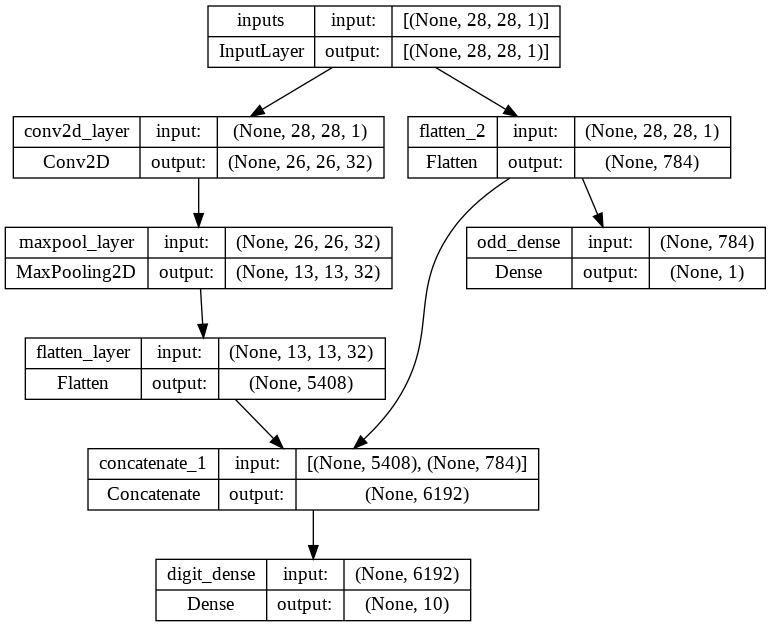

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')


In [15]:
model.compile(optimizer='adam', loss={'digit_dense': 'sparse_categorical_crossentropy',
                                      'odd_dense': 'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense': 0.5},
              metrics=['accuracy'])

history=model.fit({'inputs':x_train_in},{'digit_dense':y_train, 'odd_dense':y_train_odd},
                  validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid,
                  'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 4ms/step - loss: 0.3748 - digit_dense_loss: 0.2132 - odd_dense_loss: 0.3233 - digit_dense_accuracy: 0.9391 - odd_dense_accuracy: 0.8661 - val_loss: 0.2288 - val_digit_dense_loss: 0.0908 - val_odd_dense_loss: 0.2760 - val_digit_dense_accuracy: 0.9727 - val_odd_dense_accuracy: 0.8911
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2189 - digit_dense_loss: 0.0831 - odd_dense_loss: 0.2716 - digit_dense_accuracy: 0.9757 - odd_dense_accuracy: 0.8914 - val_loss: 0.1974 - val_digit_dense_loss: 0.0653 - val_odd_dense_loss: 0.2641 - val_digit_dense_accuracy: 0.9794 - val_odd_dense_accuracy: 0.8962
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1941 - digit_dense_loss: 0.0627 - odd_dense_loss: 0.2627 - digit_dense_accuracy: 0.9809 - odd_dense_accuracy: 0.8962 - val_loss: 0.2028 - val_digit_dense_loss: 0.0735 - val_odd_dense_loss: 0.2586 - val_digit_dense_accuracy: 0.9770 - val_

In [16]:
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 1s 3ms/step - loss: 0.1920 - digit_dense_loss: 0.0639 - odd_dense_loss: 0.2560 - digit_dense_accuracy: 0.9825 - odd_dense_accuracy: 0.9014


[0.19195228815078735,
 0.06393923610448837,
 0.2560262382030487,
 0.9825000166893005,
 0.9014000296592712]

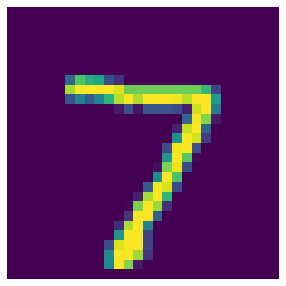

In [17]:
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis("off")
  plt.show()

plot_image(x_valid, 0)

In [18]:
digit_preds, odd_preds = model.predict(x_valid_in)

print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 1s 2ms/step
[2.5237345e-12 2.8370228e-09 1.1834888e-09 1.1170099e-06 9.7275859e-12
 7.7133124e-13 2.3178969e-20 9.9999893e-01 2.2952136e-09 1.2045778e-08]
[0.99956733]


In [19]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]




array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [20]:
odd_labels =(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-20-8b491d78be3d>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels =(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [21]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output=model.get_layer('flatten_layer').output

base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


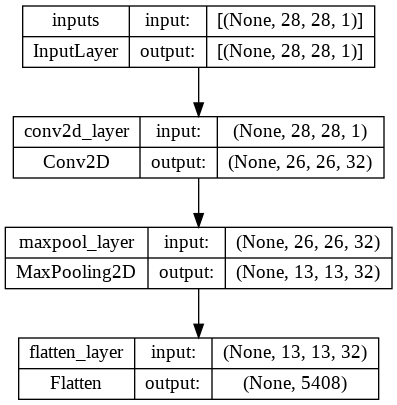

In [22]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [24]:
digit_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(10, activation='softmax')
])

digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


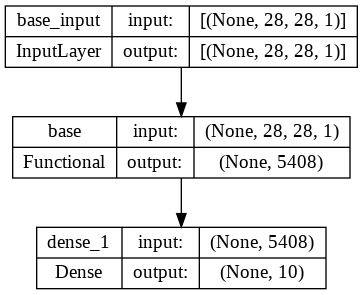

In [25]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')


In [26]:
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history= digit_model.fit(x_train_in, y_train,
                         validation_data=(x_valid_in, y_valid),
                         epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1282 - accuracy: 0.9646 - val_loss: 0.0655 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.0549 - val_accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0508 - val_accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0359 - accuracy: 0.9891 - val_loss: 0.0612 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0298 - accuracy: 0.9909 - val_loss: 0.0593 - val_accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.0500 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0585 - val_accuracy:

In [27]:
base_model_frozen =tf.keras.models.Model(inputs=model.input,
                                         outputs=base_model_output,
                                         name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________
